# Build a 2D array for time series data 
Start by importing all the important libraries and setting up for large graphs.

In [2]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

# Create a numpy array with zeros()
empty() works like zeros(), but there is no initialization so you don't know what will be in the array.

ones() fills the array with value 1 instead of value zero

a is a two dimensional array with 2 rows and 3 columns

array indices start with 0, 1, 2,... so that a[0,1] is the element in the first row and the second column, while a[1,2] is the element in the second row and the third column.

( Note that you can make an array with zero elements and then add to it with append(), concatenate(), or insert(). )

In [3]:
a = zeros((2,3))
a[0,1] = 1.3
a[1,2] = 5.1
print(a)

[[0.  1.3 0. ]
 [0.  0.  5.1]]


# Create numpy arrays by direct assignment
b is a one dimensional row array

c is a two dimensional array with only one column, so sort of a 1D array tipped on end

d is the same as c, but not tipped on end, so it can't hstack()

In [4]:
b = array([1,2,3])      # 1 row, 3 columns
b

array([1, 2, 3])

In [5]:
c = array([[2.2],[3.3]])    # 2 rows, 1 column
c

array([[2.2],
       [3.3]])

In [6]:
d = array([2.2,3.3])       # 1 row, 2 columns, really a 1D array
d

array([2.2, 3.3])

# Add rows and columns with hstack() and vstack()
There are many powerful functions for changing the shapes of arrays and combining them into new arrays of different dimensions. For most of what we will do in MECH 217 it could be easier to define the arrays and fill them, rather than keeping track of the combinations.

In [7]:
vstack((a,b))   # must have the same number of columns 

array([[0. , 1.3, 0. ],
       [0. , 0. , 5.1],
       [1. , 2. , 3. ]])

In [8]:
hstack((a,c))   # must have the same number of rows

array([[0. , 1.3, 0. , 2.2],
       [0. , 0. , 5.1, 3.3]])

In [9]:
vstack((hstack((a,c)),hstack((c,a)))) 

array([[0. , 1.3, 0. , 2.2],
       [0. , 0. , 5.1, 3.3],
       [2.2, 0. , 1.3, 0. ],
       [3.3, 0. , 0. , 5.1]])

In [10]:
hstack((a,d))  # fails because d is 1D

ValueError: all the input arrays must have same number of dimensions

In [14]:
e = d.reshape((2,1))
hstack((e,a))   # succeeds because we changed the shape of d

array([[2.2, 0. , 1.3, 0. ],
       [3.3, 0. , 0. , 5.1]])

# Put 1D arrays into a 2D array as columns

Create a bunch of discrete times when we would sample the temperature, then create a matching set of temperature values. By specifying the population mean and standard deviation to sample from, we know roughly what our sample results should be. This is just some random data for the example.

In [15]:
cnt =11
t = linspace(0,1,cnt)
Tbar = 24
sigmaT = 0.3
T = Tbar + sigmaT * np.random.randn(cnt)

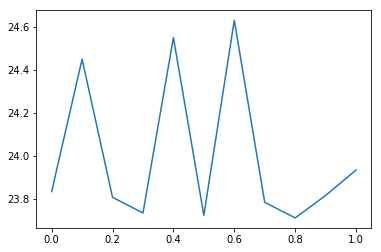

In [16]:
plot(t,T)

In [17]:
t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [18]:
T

array([23.83520884, 24.4489209 , 23.80841778, 23.73567388, 24.54916164,
       23.72526794, 24.62927071, 23.7852908 , 23.71295074, 23.81689271,
       23.9347371 ])

Now we have two vectors t and T that we can plot, which will usually meet all our needs. If we would like to combine them in a 2D table, with column 0 containing the time t and column 1, the temperature T. Leaving a couple of empty columns to fill in for later might be helpful. t.size is the number of elements in t[ ]. We could get the same result by using len(t).

In [19]:
aa = zeros((t.size,4))
aa[:,0] = t
aa[:,1] = T
aa

array([[ 0.        , 23.83520884,  0.        ,  0.        ],
       [ 0.1       , 24.4489209 ,  0.        ,  0.        ],
       [ 0.2       , 23.80841778,  0.        ,  0.        ],
       [ 0.3       , 23.73567388,  0.        ,  0.        ],
       [ 0.4       , 24.54916164,  0.        ,  0.        ],
       [ 0.5       , 23.72526794,  0.        ,  0.        ],
       [ 0.6       , 24.62927071,  0.        ,  0.        ],
       [ 0.7       , 23.7852908 ,  0.        ,  0.        ],
       [ 0.8       , 23.71295074,  0.        ,  0.        ],
       [ 0.9       , 23.81689271,  0.        ,  0.        ],
       [ 1.        , 23.9347371 ,  0.        ,  0.        ]])

Now take a new line of 4 values and add it on to the bottom of the array.

In [20]:
new = array([1.1,23,3,4])
aa = vstack((aa,new))
print(aa)


[[ 0.         23.83520884  0.          0.        ]
 [ 0.1        24.4489209   0.          0.        ]
 [ 0.2        23.80841778  0.          0.        ]
 [ 0.3        23.73567388  0.          0.        ]
 [ 0.4        24.54916164  0.          0.        ]
 [ 0.5        23.72526794  0.          0.        ]
 [ 0.6        24.62927071  0.          0.        ]
 [ 0.7        23.7852908   0.          0.        ]
 [ 0.8        23.71295074  0.          0.        ]
 [ 0.9        23.81689271  0.          0.        ]
 [ 1.         23.9347371   0.          0.        ]
 [ 1.1        23.          3.          4.        ]]


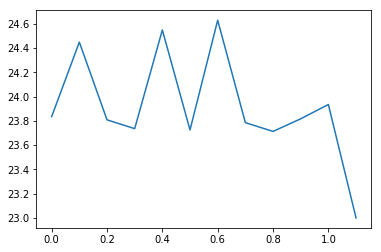

In [21]:
plot(aa[:,0],aa[:,1])

## We can reference different parts of the array by slicing using colons.

Try some of your own to get the hang of it! The indices can be variables or expressions, not just constants.

In [22]:
print(aa[:,0:2])

[[ 0.         23.83520884]
 [ 0.1        24.4489209 ]
 [ 0.2        23.80841778]
 [ 0.3        23.73567388]
 [ 0.4        24.54916164]
 [ 0.5        23.72526794]
 [ 0.6        24.62927071]
 [ 0.7        23.7852908 ]
 [ 0.8        23.71295074]
 [ 0.9        23.81689271]
 [ 1.         23.9347371 ]
 [ 1.1        23.        ]]


In [23]:
print(aa[:3,3:])

[[0.]
 [0.]
 [0.]]


In [24]:
print(aa[5:,1:])

[[23.72526794  0.          0.        ]
 [24.62927071  0.          0.        ]
 [23.7852908   0.          0.        ]
 [23.71295074  0.          0.        ]
 [23.81689271  0.          0.        ]
 [23.9347371   0.          0.        ]
 [23.          3.          4.        ]]


In [25]:
def h(x):
    x[3,0]=3.14159
h(aa)
aa

array([[ 0.        , 23.83520884,  0.        ,  0.        ],
       [ 0.1       , 24.4489209 ,  0.        ,  0.        ],
       [ 0.2       , 23.80841778,  0.        ,  0.        ],
       [ 3.14159   , 23.73567388,  0.        ,  0.        ],
       [ 0.4       , 24.54916164,  0.        ,  0.        ],
       [ 0.5       , 23.72526794,  0.        ,  0.        ],
       [ 0.6       , 24.62927071,  0.        ,  0.        ],
       [ 0.7       , 23.7852908 ,  0.        ,  0.        ],
       [ 0.8       , 23.71295074,  0.        ,  0.        ],
       [ 0.9       , 23.81689271,  0.        ,  0.        ],
       [ 1.        , 23.9347371 ,  0.        ,  0.        ],
       [ 1.1       , 23.        ,  3.        ,  4.        ]])

In [31]:
a = (1,2,3)
def g(x):
    a,b,c = x
    print(a,b,c)
    b = 4
    x = (a,b,c)
    print(x)
g(a)
a

1 2 3
(1, 4, 3)


(1, 2, 3)